## Download the dataset from Esri Geodata online/ CEDD direct link 
Here is the sample of the digital terrain model from Esri :<br>
https://opendata.esrichina.hk/datasets/esrihk::hong-kong-digital-terrain-model-from-2020-lidar-survey-by-tile-1/explore

In this example, we will use the Lantau Peak (9SE22C) DTM as sample :<br>
https://bulkdata.csdi.gov.hk/cedd/lidar/2020dtm/9SE22C(e809n812,e809n812).zip


Calculate the Cov(d), V (d), R(d) with different d ranging from 0 to 8 from raster layer in python code, step by step explain in details 

In [112]:
!pip install geopandas
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
# Import packages
import os
import rasterio 
import geopandas
import numpy as np

# Open Digital Terrain Model
hkdtm = rasterio.open('/content/9SE22C(e809n812,e809n812).tif')
# Please be aware that the path, I have tried different computer performance, only the mac can process teh path with () open and close bracket

# Extract the region
hkdtm = hkdtm.read(1, masked=True, window=rasterio.windows.Window(col_off=18, row_off=18,width=18, height=18)) 
# Change the col and row according to the your selected table column and rows
# The width and height here means "each pixel" width and heigh 

# Transform the extracted raster as an array
arr = np.array(hkdtm).astype('float')
# since this extract will not be an interger, so assign the array as float

In [131]:
# print(arr)
# print(np.array2string(arr).replace('[[',' [').replace(']]',']'))

# Print the table according to the extraction 
from pprint import pprint
import pandas as pd
# Data frame, here we set it blank "", but you can change it accoring to your own style 
table = pd.DataFrame(arr, columns = ['','','','','','','','','','','','','','','','','',''], index = ['','','','','','','','','','','','','','','','','',''])

print(table)

                                                                          \
  439.324554  439.523743  439.800262  440.231049  440.284454  440.468994   
  439.180450  439.338654  439.646942  440.009613  440.032440  440.200928   
  438.775055  438.983887  439.178528  439.527191  439.784393  439.907135   
  438.365845  438.606140  438.786957  439.036194  439.262665  439.566864   
  438.038544  438.304230  438.581573  438.651581  438.832092  439.129852   
  437.537476  437.965118  438.353210  438.498413  438.664673  438.857971   
  437.455383  437.720581  438.220856  438.417816  438.468079  438.791077   
  437.424835  437.680603  438.139069  438.281982  438.376984  438.607056   
  437.633911  437.921295  438.045319  438.289398  438.292297  438.503601   
  437.653931  437.821838  437.873566  438.101654  438.335938  438.428070   
  437.419586  437.612915  437.665985  437.862885  438.215393  438.367889   
  437.199280  437.423157  437.643433  437.719940  437.974915  438.263947   
  436.986481

In [132]:
import numpy as np
from scipy.stats import pearsonr

# Iterate through d values from 0 to 8
for d in range(9):
    # Calculate Cov(d) Covariance 
    cov_d = np.mean([arr[i,i+d] * arr[j,j+d] for i in range(arr.shape[1] - d) for j in range(arr.shape[0] - d)])
    # Calculate V(d) Variance 
    v_d = np.mean([(arr[i,i+d])**2 for i in range(arr.shape[1] - d) for j in range(arr.shape[0] - d)])
    # Calculate R(d) 
    r_d = pearsonr(arr[0,d:], arr[1,d:])[0]
    print("For d = {}, Cov(d) = {}, V(d) = {}, R(d) = {}".format(d, cov_d, v_d, r_d))

For d = 0, Cov(d) = 193071.0405149497, V(d) = 193071.18949154692, R(d) = 0.9968185628180135
For d = 1, Cov(d) = 193264.12543859557, V(d) = 193264.24386662774, R(d) = 0.9965139762282172
For d = 2, Cov(d) = 193495.8785663318, V(d) = 193495.9685518383, R(d) = 0.9959336029231166
For d = 3, Cov(d) = 193715.36320931, V(d) = 193715.42827427137, R(d) = 0.9957720986695421
For d = 4, Cov(d) = 193888.3815860946, V(d) = 193888.43176066835, R(d) = 0.9951339494381652
For d = 5, Cov(d) = 194072.39042523422, V(d) = 194072.4273208086, R(d) = 0.9938982513023887
For d = 6, Cov(d) = 194259.30486882624, V(d) = 194259.32891362868, R(d) = 0.9919467848477075
For d = 7, Cov(d) = 194456.42111465463, V(d) = 194456.43224629396, R(d) = 0.9888550820225882
For d = 8, Cov(d) = 194635.70105863406, V(d) = 194635.70684018254, R(d) = 0.9837213613945754


In [130]:
for d in range(9):
    # Calculate R(d) 
    r_d = pearsonr(arr[0,d:], arr[1,d:])[0]
    print(r_d, end =',')
    # Copy the r_d (below):

0.9968185628180135,0.9965139762282172,0.9959336029231166,0.9957720986695421,0.9951339494381652,0.9938982513023887,0.9919467848477075,0.9888550820225882,0.9837213613945754,

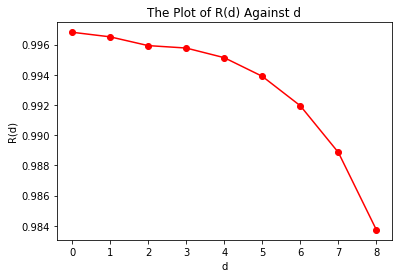

In [128]:
import matplotlib.pyplot as plt

d = [0,1,2,3,4,5,6,7,8]
# Paste the r_d here 
r_d = [0.9968185628180135,0.9965139762282172,0.9959336029231166,0.9957720986695421,0.9951339494381652,0.9938982513023887,0.9919467848477075,0.9888550820225882,0.9837213613945754]
plt.plot(d, r_d, 'ro-')
plt.xlabel('d')
plt.ylabel('R(d)')
plt.title('The Plot of R(d) Against d')
plt.show()

##Flow analysis with Digtial Terrain Model

In [155]:
import rasterio
import numpy as np

# open the raster file
raster = rasterio.open("/content/9SE22C(e809n812,e809n812).tif")
# read the data in the raster
data = raster.read(1)

# calculate flow direction
direction = np.empty(data.shape, dtype=np.uint8)
for i in range(1, data.shape[0]-1):
    for j in range(1, data.shape[1]-1):
        if data[i, j] == 0:
            direction[i, j] = 0
        else:
            if data[i-1, j] > data[i, j]:
                direction[i, j] = 1
            elif data[i, j-1] > data[i, j]:
                direction[i, j] = 2
            elif data[i+1, j] > data[i, j]:
                direction[i, j] = 4
            else:
                direction[i, j] = 8

# calculate accumulation
accumulation = np.zeros(data.shape)
for i in range(1, data.shape[0]-1):
    for j in range(1, data.shape[1]-1):
        if direction[i, j] & 1:
            accumulation[i, j] += accumulation[i-1, j]
        if direction[i, j] & 2:
            accumulation[i, j] += accumulation[i, j-1]
        if direction[i, j] & 4:
            accumulation[i, j] += accumulation[i+1, j]
        if direction[i, j] & 8:
            accumulation[i, j] += accumulation[i, j+1]
        accumulation[i, j] += 1

In [137]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.3 MB/s eta 0:00:00


In [163]:
print(direction)
print()
print(accumulation)

[[  5  11  44 ... 179 154  66]
 [ 31   1   1 ...   1   1  63]
 [238   1   1 ...   2   2  64]
 ...
 [  0   1   1 ...   1   1  63]
 [  0   1   1 ...   1   1  63]
 [  0   0 128 ...   0 128  63]]

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  1. ...  1.  1.  0.]
 [ 0.  2.  2. ...  7.  8.  0.]
 ...
 [ 0. 11. 16. ... 37. 36.  0.]
 [ 0. 12. 17. ... 38. 37.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


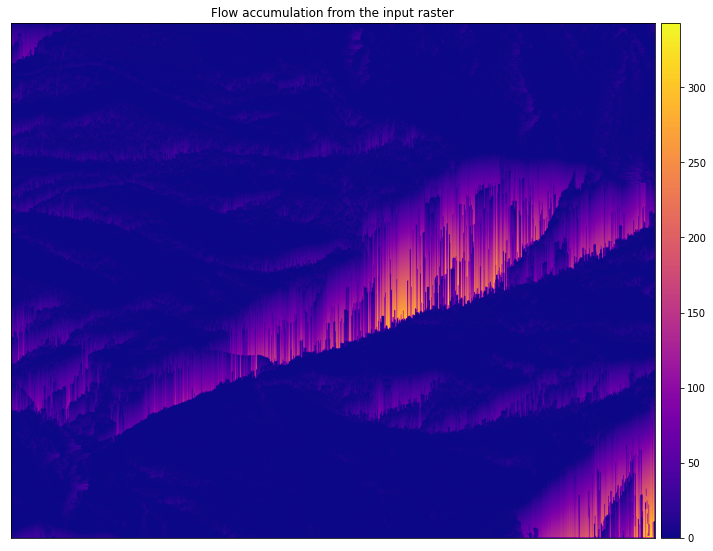

In [159]:
import earthpy as et
import earthpy.plot as ep
ep.plot_bands(accumulation, title="Flow accumulation from the input raster", cmap="plasma")
plt.show()

In [172]:
# Importing libraries
import numpy as np
import pandas as pd
import rasterio as rio

# Loading raster
src = rio.open("/content/9SE22C(e809n812,e809n812).tif")

# Estimating dust flux
cellsize = src.res[0]
arr = src.read(1, masked = True)

# Calculating elevation difference
elev_diff = []
for y in range(src.height):
    for x in range(src.width):
        if x != src.width-1 and y != src.height-1:
            elev_diff.append(abs(arr[y,x] - arr[y,x+1]))
            elev_diff.append(abs(arr[y,x] - arr[y+1,x]))

# Computing dust flux
flux = np.array(elev_diff) * cellsize

# Outputting dust flux results
print("Dust flux:", flux)

[0.10594177 0.07966614 0.02662659 ... 0.13876343 0.14068604 0.26013184]


## Aspect and Slope computation

In [186]:
# Import the necessary libraries
import numpy as np
import rasterio as rio

# Open the digital terrain model (DTM) raster
with rio.open('/content/9SE22C(e809n812,e809n812).tif') as src:
    dtm_data = src.read(1)

# Compute the slope from the DTM raster
# Slope is the change in elevation over the change in horizontal distance
slope = np.gradient(dtm_data)[1]

# Compute the aspect from the DTM raster
# Aspect is the direction the slope faces
aspect = np.arctan2(np.gradient(dtm_data)[0], np.gradient(dtm_data)[1])

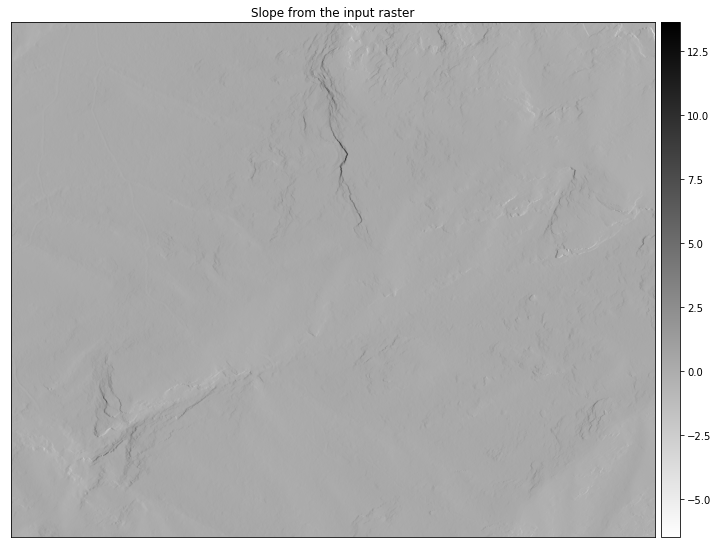

In [189]:
ep.plot_bands(slope, title="Slope from the input raster", cmap="gist_yarg")
plt.show()

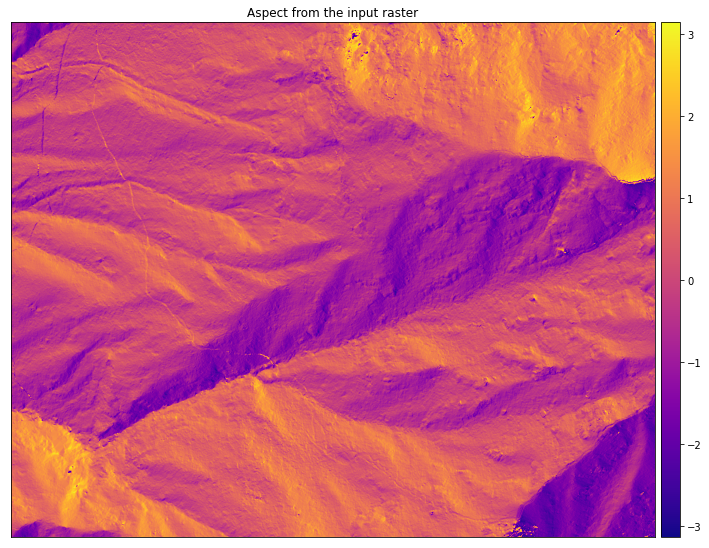

In [188]:
ep.plot_bands(aspect, title="Aspect from the input raster", cmap="plasma")
plt.show()

In [195]:
import numpy as np
from osgeo import gdal

# Read in the Digital Terrain Model raster
ras = gdal.Open('/content/9SE22C(e809n812,e809n812).tif')
arr = ras.ReadAsArray()

# Apply a generic terrain feature glassification algorithm to the DTM
result = np.zeros_like(arr).astype('float32')

for x in range(arr.shape[0]):
    for y in range(arr.shape[1]):
        # Apply the algorithm at each pixel
        # The parameters of the algorithm must be adjusted according to the particular terrain being analyzed
        result[x, y] = np.mean(arr[x-1:x+1, y-1:y+1])


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


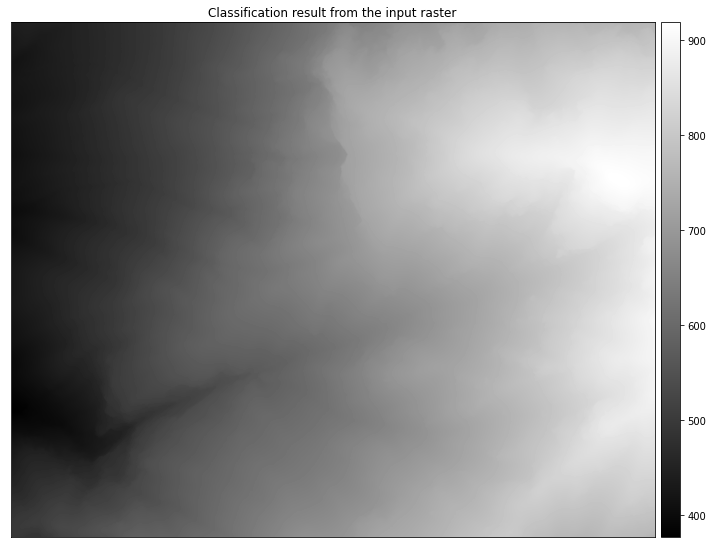

In [197]:
ep.plot_bands(result, title="Classification result from the input raster", cmap="gray")
plt.show()

In [ ]:
# Write out the modified DTM raster
outRas = gdal.GetDriverByName("GTiff").Create("output.tif", arr.shape[0], arr.shape[1], 1, gdal.GDT_Float32)
outRas.GetRasterBand(1).WriteArray(result)
outRas = None

In [199]:
# Import Libraries
import numpy as np
import rasterio

# Read Digital Terrain Model Raster Data
with rasterio.open('/content/9SE22C(e809n812,e809n812).tif') as src:
    dtm = src.read()

# Create Wind Flow Dynamic Computation
# Create a array of the elevations
elevations = dtm[0,:,:]

# Calculate the x and y gradients
dx, dy = np.gradient(elevations)

# Calculate the wind flow direction
wind_flow = np.arctan2(dy, dx)

# Output the result
print(wind_flow)

[[ 2.2155638  1.9315836  2.0799456 ... -2.3765402 -2.1411614 -1.3711836]
 [ 2.0013075  1.8500967  2.5866039 ... -1.7218622 -1.8150666 -1.0461552]
 [ 1.9060515  2.1127822  2.9612014 ... -1.2236865 -1.2291006 -0.9934258]
 ...
 [ 2.1334012  2.2721272  2.229689  ... -2.408854  -2.894657  -2.8808095]
 [ 2.6252317  2.4779153  2.363885  ... -2.7130473 -2.834937  -2.6787248]
 [ 2.7952328  2.5691571  2.5412307 ... -2.478505  -2.6699994 -2.6622665]]


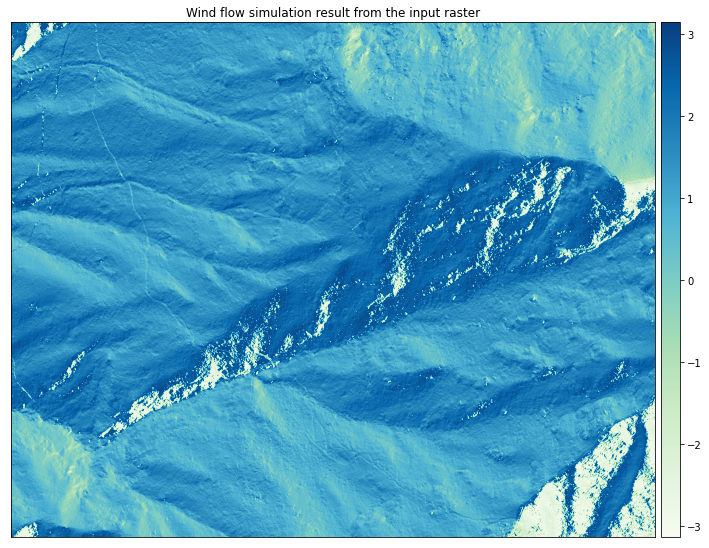

In [204]:
ep.plot_bands(wind_flow, title="Wind flow simulation result from the input raster", cmap="GnBu")
plt.show()


In [217]:
# Import libraries 
import numpy as np 
import math
import scipy.ndimage.morphology

with rio.open('/content/9SE22C(e809n812,e809n812).tif') as src:
    dtm_data = src.read(1)

# Compute the wind flow dynamic in 16 directions
directions = np.arange(0, 360, 22.5)
for direction in directions:
    # Compute the gradients of the DTM in the x and y directions
    dy, dx = np.gradient(dtm_data)

    # Rotate the gradients by the angle of the direction vector (in radians)
    angle_radians = (direction * np.pi) / 180
    dx_rotated = np.cos(angle_radians) * dx + np.sin(angle_radians) * dy
    dy_rotated = -np.sin(angle_radians) * dx + np.cos(angle_radians) * dy

    # Calculate the direction vector of the wind flow
    direction_vector = np.arctan2(dy_rotated, dx_rotated)
    direction_vector = np.rad2deg(direction_vector)

    # Use a morphological operator to detect sharp edges
    direction_vector = scipy.ndimage.morphology.binary_dilation(direction_vector, structure=np.ones((3, 3)))

    # Calculate the magnitude of the wind flow
    magnitude = np.sqrt(np.power(dx, 2) + np.power(dy, 2))

    # Save the direction vector and magnitude to a file
    np.savetxt('direction_vector_{}.txt'.format(direction), direction_vector)
    np.savetxt('magnitude_{}.txt'.format(direction), magnitude)

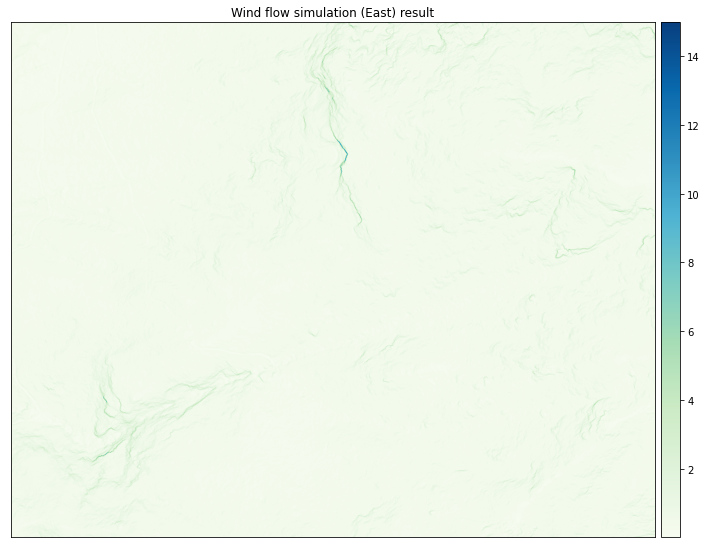

In [225]:
#Read txt to raster
import numpy as np 
import matplotlib.pyplot as plt

txt_data = np.loadtxt('/content/magnitude_90.0.txt')

rows, cols = txt_data.shape

#Convert txt to raster
raster_data = np.zeros((rows, cols))

for row in range(rows):
    for col in range(cols):
        raster_data[row, col] = txt_data[row, col]

#Plot the graph
ep.plot_bands(raster_data, title="Wind flow simulation (East) result", cmap="GnBu")
plt.show()
